In [5]:
# Import required packages.
import pandas as pd
import matplotlib.pyplot as plt

# Exercise 1

In [6]:
# Creates necessary function: see Docstrings. 
def to_data_frame(filename, summary = False):
    """
    Creates a data frame for the given file (.gct) and
    prints the number of rows and columns (if summary is True)
    
    Parameters:
    filename (.gct): The file to convert.
    summary (boolean): True/False value if row and column
    size should be printed.
    
    Returns:
    dataframe: the converted file.
    """
    # Read the file in through read_csv, using tabs instead of commas.
    # Skips first 2 rows.
    df = pd.read_csv(filename, sep='\t', skiprows=2)
    
    # Turns the name and description column into index.
    df.set_index(["Name", "Description"], inplace=True)
    
    # If summary is True, then prints out number of rows and columns.
    if summary == True:
        row, col = df.shape
        print(f"Rows: {row}")
        print(f"Columns: {col}")
        
    # Returns the data frame.
    return df

# Exercise 2

In [7]:
# Sets function1 and function2 to given datasets.
function1 = "BRCA_minimal_60x19.gct"

# Calls to_data_frame, first with # of columns and rows, and then without.
func_1_df = to_data_frame(function1, True)


Rows: 60
Columns: 19


In [8]:
# Sets function1 and function2 to given datasets.
function2 = "BRCA_large_20783x40.gct"

# Calls to_data_frame, first with # of columns and rows, and then without.
func_2_df = to_data_frame(function2)

# Exercise 3

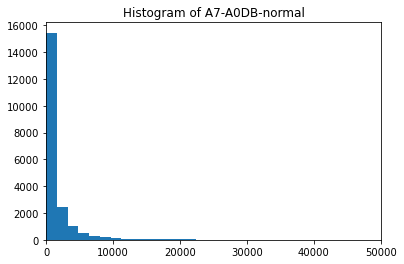

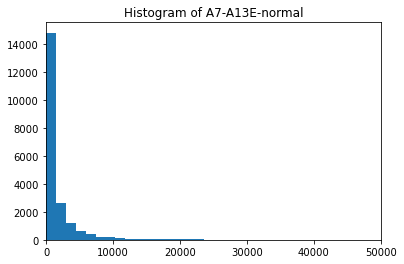

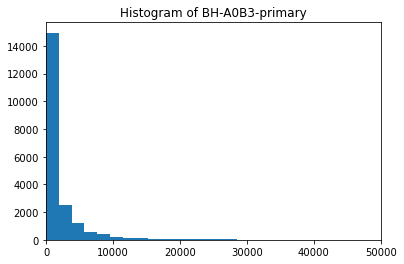

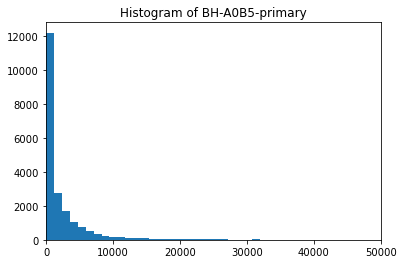

In [9]:
# Plots histograms with their respective titles
for i in ["A7-A0DB-normal", "A7-A13E-normal", "BH-A0B3-primary", "BH-A0B5-primary"]:
    plt.figure()
    df_2_plot = plt.hist(func_2_df[i], bins = 500)
    plt.xlim(0,50000)
    plt.title(f"Histogram of {i}")

# Exercise 4

In [10]:
# Turns the samples into rows.
summary_df = func_2_df.describe().T 

# Calculates the rows to be the mean, median, and standard deviation.
summary_df = summary_df[['mean', '50%', 'std']]

# Renames the 50% to be named "median".
summary_df.rename(columns={'50%': 'median'}, inplace=True)
print(summary_df)

                        mean  median           std
A7-A0CE-normal   3308.877255   814.0  12725.531516
A7-A0CH-normal   3046.316942   630.0  14145.451194
A7-A0D9-normal   2628.131550   350.0  17827.391513
A7-A0DB-normal   2354.674445   362.0  13973.914409
A7-A13E-normal   2380.702593   427.0  13373.496798
A7-A13F-normal   2493.380215   527.0  12477.592390
A7-A13G-normal   3509.542463   454.0  30474.663592
AC-A23H-normal   3396.675312   659.0  20073.855034
AC-A2FB-normal   3675.583169   792.0  15577.976864
AC-A2FF-normal   3743.660492   935.0  14827.012985
AC-A2FM-normal   2714.893663   578.0  11431.472640
BH-A0AU-normal   2436.466679   641.0   8961.357233
BH-A0AY-normal   2412.727951   567.0   9362.391989
BH-A0AZ-normal   3216.765337   836.0  10744.505522
BH-A0B3-normal   2879.876149   772.0   9737.708560
BH-A0B5-normal   3129.721455   358.0  26253.260752
BH-A0B7-normal   2337.598326   599.0   8270.506432
BH-A0B8-normal   2765.395516   382.0  18276.317114
BH-A0BA-normal   2185.575615   

# Exercise 5

In [11]:
# Filters rows from #2b whose maximum value is < 1000.
filtered_df = func_2_df.loc[func_2_df.max(axis=1) >= 1000]

Mean of each column after filtering: 
A7-A0CE-normal     5058.274447
A7-A0CH-normal     4665.274373
A7-A0D9-normal     4030.654502
A7-A0DB-normal     3608.259552
A7-A13E-normal     3647.490728
A7-A13F-normal     3815.334550
A7-A13G-normal     5381.639979
AC-A23H-normal     5200.198928
AC-A2FB-normal     5629.312281
AC-A2FF-normal     5725.120801
AC-A2FM-normal     4149.738735
BH-A0AU-normal     3713.193491
BH-A0AY-normal     3689.122440
BH-A0AZ-normal     4907.938557
BH-A0B3-normal     4395.092798
BH-A0B5-normal     4805.087063
BH-A0B7-normal     3566.225441
BH-A0B8-normal     4241.337827
BH-A0BA-normal     3341.934758
BH-A0Bc-normal     3719.878156
A7-A0CE-primary    4736.628063
A7-A0CH-primary    3464.356893
A7-A0D9-primary    4077.239815
A7-A0DB-primary    4564.934609
A7-A13E-primary    3626.344679
A7-A13F-primary    4055.368139
A7-A13G-primary    3504.240262
AC-A23H-primary    5456.304014
AC-A2FB-primary    5019.948388
AC-A2FF-primary    5117.174872
AC-A2FM-primary    4472.094288
B

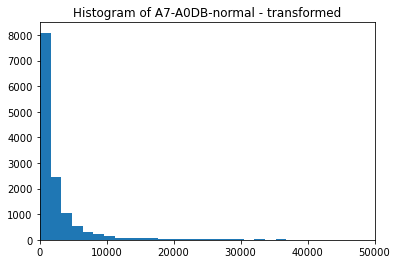

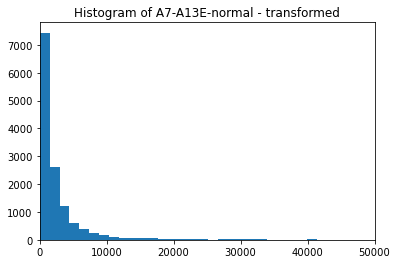

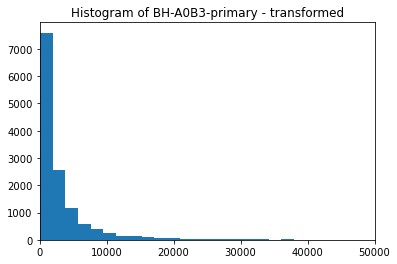

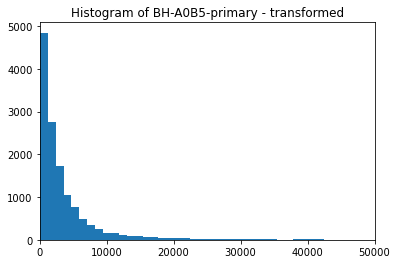

In [12]:
# Finds the mean and median of the columns.
filtered_mean = filtered_df.mean()
filtered_median = filtered_df.median()

# Prints the means and medians. 
print(f"Mean of each column after filtering: \n{filtered_mean}")
print(f"Median of each column after filtering: \n{filtered_median}")

# Plots histograms with their respective titles
for i in ["A7-A0DB-normal", "A7-A13E-normal", "BH-A0B3-primary", "BH-A0B5-primary"]:
    plt.figure()
    df_2_plot = plt.hist(filtered_df[i], bins = 500)
    plt.xlim(0,50000)
    plt.title(f"Histogram of {i} - transformed")